In [ ]:
#conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free/
#conda config --set show_channel_urls yes
#conda config --show

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,SparsePCA,FactorAnalysis
pd.set_option('display.max_columns',None)
%matplotlib inline
import os
os.chdir('C:/Users/acerpc/Desktop/data_folder')

In [2]:
provinces = pd.read_csv('cities_10.csv',encoding='gbk')
provinces

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7
5,上海,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0
6,浙江,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9
7,福建,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9
8,广东,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6
9,广西,2455.4,5062,367.0,995.7,542.2,352.7,1025.5,15.1,186.7


In [3]:
provinces.loc[:,'X1':].corr(method='pearson')

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,1.000000,-0.094292,0.966506,0.979238,0.922984,0.921680,0.941148,0.637458,0.825568
X2,-0.094292,1.000000,0.112726,0.074167,0.214052,0.093483,-0.042776,0.081195,0.273145
X3,0.966506,0.112726,1.000000,0.985373,0.963159,0.939194,0.935196,0.704714,0.898016
X4,0.979238,0.074167,0.985373,1.000000,0.972862,0.939720,0.962267,0.713890,0.913364
X5,0.922984,0.214052,0.963159,0.972862,1.000000,0.971337,0.937109,0.716722,0.934549
X6,0.921680,0.093483,0.939194,0.939720,0.971337,1.000000,0.897127,0.624294,0.848004
X7,0.941148,-0.042776,0.935196,0.962267,0.937109,0.897127,1.000000,0.836272,0.928692
X8,0.637458,0.081195,0.704714,0.713890,0.716722,0.624294,0.836272,1.000000,0.881528
X9,0.825568,0.273145,0.898016,0.913364,0.934549,0.848004,0.928692,0.881528,1.000000


In [8]:
#主成分分析（预先进行标准化）
from sklearn.preprocessing import scale ,StandardScaler

n_components = 2
# scale_cities = scale(cities.ix[:,'X1':])
ss = StandardScaler()
scale_x = ss.fit_transform(provinces.loc[:,'X1':])

pca = PCA(n_components = n_components)
factors = pca.fit(scale_x)
factors.explained_variance_ratio_

array([0.80112955, 0.12214932])

In [5]:
n_components = 9
# scale_cities = scale(cities.ix[:,'X1':])
ss = StandardScaler()
scale_x = ss.fit_transform(provinces.loc[:,'X1':])

pca = PCA(n_components=n_components)
factors = pca.fit(scale_x)
factors.explained_variance_ratio_

array([8.01129553e-01, 1.22149318e-01, 6.07923991e-02, 9.88894782e-03,
       3.86004507e-03, 1.51746715e-03, 4.88067443e-04, 1.33610801e-04,
       4.05920593e-05])

In [6]:
factors.components_#特征向量(主成分)

array([[ 3.53682143e-01,  4.05551498e-02,  3.64148181e-01,
         3.67584395e-01,  3.65917167e-01,  3.52118961e-01,
         3.64419144e-01,  2.97564581e-01,  3.55405274e-01],
       [-2.12191559e-01,  9.42778360e-01, -9.84532636e-03,
        -4.53768388e-02,  9.52128595e-02, -2.30265234e-02,
        -1.35240724e-01,  4.80468901e-02,  1.83829954e-01],
       [-2.47626704e-01, -1.27315077e-01, -1.83605835e-01,
        -1.54497997e-01, -1.65381842e-01, -3.15878276e-01,
         1.50223169e-01,  8.02794187e-01,  2.65923685e-01],
       [-3.84183433e-01, -1.21281928e-01, -3.41020247e-01,
        -3.01899230e-01,  2.83114366e-01,  7.36801289e-01,
        -2.37835253e-02,  8.12809195e-02, -7.32821495e-03],
       [ 3.90604324e-02,  4.33484737e-02,  6.10942054e-01,
        -2.00595798e-01, -2.20270476e-01,  2.53840201e-01,
        -3.75304075e-01,  3.85563084e-01, -4.25018063e-01],
       [-1.65179615e-01, -2.29652641e-01,  2.38835045e-01,
         1.28815513e-02, -1.26848708e-01,  4.924812

In [9]:
pca_score = pd.DataFrame(factors.transform(scale_x),columns=['General','Personal'])#主成分得分
scale_provinces = pd.DataFrame(scale_x,columns=provinces.loc[:,'X1':].columns).join(pca_score)
scale_provinces.insert(0,'AREA',provinces['AREA'])
scale_provinces

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9,General,Personal
0,辽宁,-0.375748,-0.335897,-0.570700,-0.331801,-0.435115,-0.686087,-0.138827,-0.449589,-0.360085,-1.189451,-0.310922
1,山东,1.199240,-0.483152,1.144732,0.984558,0.799910,0.865054,0.664019,-0.278096,0.349766,2.064157,-0.748544
2,河北,-0.184465,-0.764857,-0.546094,-0.468842,-0.631008,-0.491085,-0.391025,-0.602244,-0.688539,-1.437690,-0.806697
3,天津,-1.438442,0.648116,-1.017166,-1.404990,-1.212338,-1.164573,-1.283762,-0.465286,-1.128613,-3.230397,0.845198
4,江苏,1.225934,-0.184302,1.172001,1.080603,0.839647,1.067215,0.693490,0.062534,0.462736,2.368927,-0.444810
5,上海,-0.391028,2.662045,0.090850,0.079324,0.395556,0.030639,-0.332866,-0.063436,0.682941,0.289972,2.792668
6,浙江,0.308403,0.051501,0.220175,0.334892,0.809939,1.179750,0.399388,-0.115041,0.203749,1.209952,-0.006385
7,福建,-0.615841,-0.280554,-0.836208,-0.661924,-0.881238,-1.061488,-0.656177,-0.351481,-0.787682,-2.096895,-0.227964
8,广东,1.576516,-0.115612,1.727300,1.763662,1.732019,1.451493,2.256409,2.925319,2.344095,5.500912,-0.142758
9,广西,-1.304569,-1.197288,-1.384891,-1.375482,-1.417372,-1.190917,-1.210649,-0.662679,-1.078367,-3.479486,-0.949785


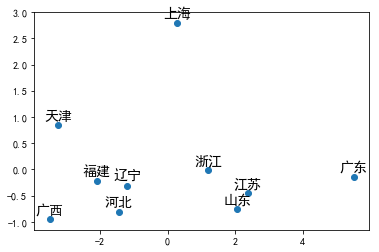

In [10]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']# 指定默认字体
mpl.rcParams['axes.unicode_minus']= False # 解决保存图像是负号'-'显示为方块的问题
x = scale_provinces['General']
y = scale_provinces['Personal']
label = scale_provinces['AREA']
plt.figure(figsize=(6,4))
plt.scatter(x,y)
for a,b,l in zip(x,y,label):
    plt.text(a,b+0.1,l,ha='center',fontsize=14)

In [12]:
#稀疏主成分分析 SparsePCA
alpha = 0.5#Sparsity controlling parameter. Higher values lead to sparser components.
spca = SparsePCA(n_components=n_components,alpha=alpha)
spca.fit(scale_x)
pd.DataFrame(spca.components_)

,0,1,2,3,4,5,6,7,8
0,2.520708,0.000000,2.592483,2.62422,2.600348,2.492157,2.60276,2.019878,2.488111
1,-0.026320,2.661756,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.161428


In [17]:
#选择合适的稀疏度
from functools import reduce
n_cols = scale_x.shape[1]
spca_with_alpha = []
for i in np.arange(0,1,0.05):
    spca = SparsePCA(n_components=n_components,alpha=i)
    spca.fit(scale_x)
    components = pd.DataFrame(spca.components_).T
    diff = np.count_nonzero(components)-n_cols
    spca_with_alpha.append((i,diff))
select = pd.DataFrame(spca_with_alpha).T
select

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
1,9.0,6.00,5.0,4.00,4.0,4.00,4.0,4.00,3.0,2.00,2.0,1.00,1.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00


In [18]:
spca = SparsePCA(n_components=n_components,alpha=0.65)
spca.fit(scale_x)
pd.DataFrame(spca.components_)

,0,1,2,3,4,5,6,7,8
0,2.365373,0.000000,2.443202,2.474257,2.452944,2.342823,2.450105,1.868462,2.356411
1,0.000000,2.512278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
scale_provinces_with_alpha = pd.DataFrame(spca.transform(scale_x),columns=['General','Personal'])
scale_provinces_with_alpha

,General,Personal
0,-0.138360,-0.106220
1,0.247921,-0.152786
2,-0.165426,-0.241869
3,-0.385271,0.204952
4,0.281828,-0.058281
5,0.021453,0.841812
6,0.143375,0.016286
7,-0.246445,-0.088719
8,0.646481,-0.036560
9,-0.405557,-0.378616


In [ ]:
#因子分析
#使用fa_kit包，参考https://github.com/bmcmenamin/fa_kit

In [23]:
#1、导入包，并对输入的数据进行主成分提取

from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plot

fa = FactorAnalysis.load_data_samples(scale_x,preproc_demean=True,#中心化
                                    preproc_scale=True)#标准化
fa.extract_components()

In [25]:
#2.设定提取主成分的方式。默认为“broken_stick”方法，建议使用“top_n”法
fa.find_comps_to_retain(method='top_n',num_keep=2)#可以先做PCA，看一下保留几个因子

array([0, 1], dtype=int64)

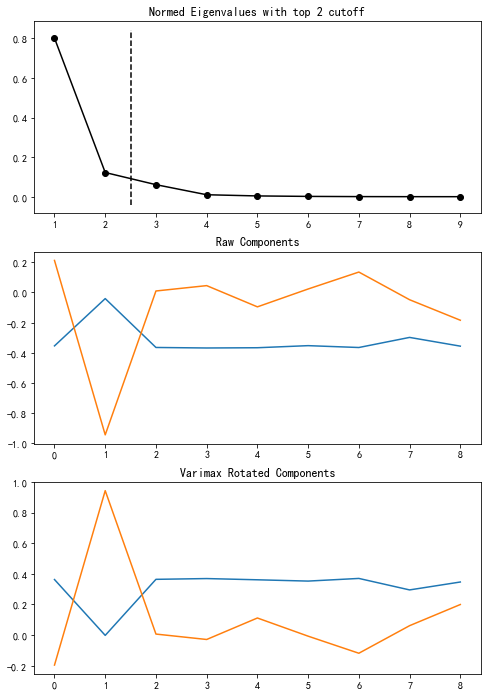

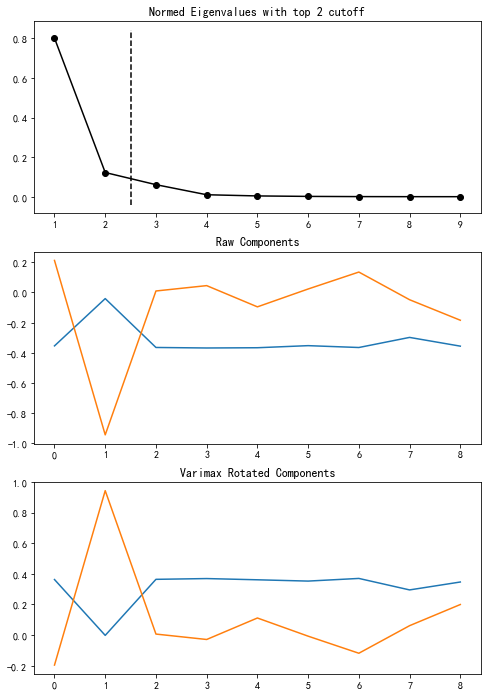

In [26]:
#3、通过最大方差法进行因子旋转
fa.rotate_components(method='varimax')
fa_plot.graph_summary(fa)

In [27]:
#4、获取因子得分
fa_comps = pd.DataFrame(fa.comps['rot'])#因子
fa_comps

,0,1
0,0.362880,-0.196047
1,-0.001947,0.943648
2,0.364222,0.006565
3,0.369255,-0.028775
4,0.361258,0.111596
5,0.352799,-0.007144
6,0.370140,-0.118691
7,0.295099,0.061400
8,0.346765,0.199650


In [28]:
fa_score = fa.get_component_scores(scale_x)#因子得分
# np.dot(scale_cities, fa_comps)

In [30]:
scale_provinces_fa = pd.DataFrame(fa_score,columns=['Gross', 'Avg'])
scale_provinces_fa

,Gross,Avg
0,-1.174241,-0.364178
1,2.095775,-0.654819
2,-1.399899,-0.870629
3,-3.265185,0.698849
4,2.386557,-0.337666
5,0.163901,2.802894
6,1.209012,0.048116
7,-2.084500,-0.322173
8,5.501759,0.105138
9,-3.433179,-1.105531


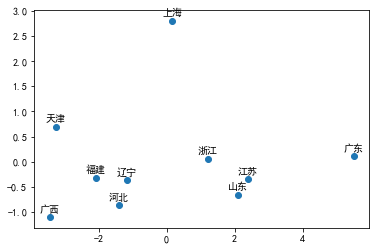

In [34]:
x = scale_provinces_fa['Gross']
y = scale_provinces_fa['Avg']
label = scale_provinces['AREA']
plt.scatter(x,y)
for a,b,l in zip(x,y,label):
    plt.text(a,b+0.1,l,ha='center')